## Imports

In [127]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers


from sklearn.model_selection import KFold

import tensorflow as tf
import random

import random

## Récupérer les données

In [128]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


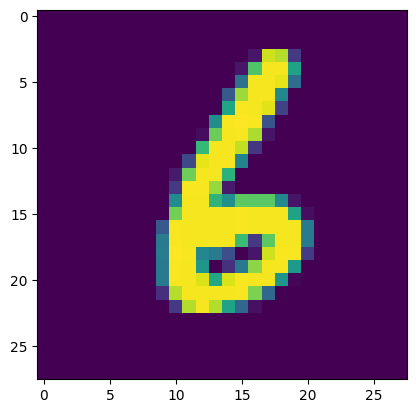

In [129]:
image_index = random.randint(0,train_images.shape[0])
plt.imshow(train_images[image_index])
plt.show()


Les images du dataset sont en fait des matrices avec 255 données. Chaque données sont un chiffre de 0 a 9.
<br>
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1
<br>
De plus on utilisers l'encodage one-hot pour nos labels. Le labbel [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.


In [130]:
train_images = tf.keras.utils.normalize(train_images,axis=1)
test_images = tf.keras.utils.normalize(test_images,axis=1)

#Passage en one-hot
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

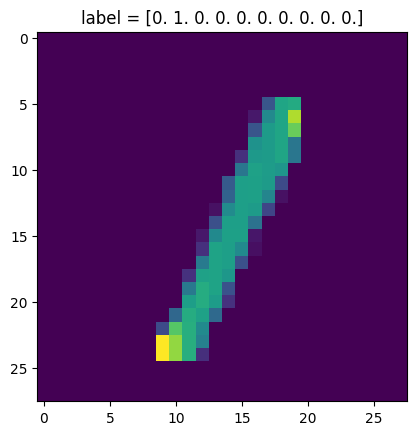

In [131]:
index = random.randint(0,len(train_images)) 
plt.imshow(train_images[index])
plt.title("label = " + str(train_labels[index]))
plt.show()

In [132]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28))) #input layer
#model.add(layers.Dense(512,activation='relu')) #hidden layer
model.add(layers.Dense(10, activation='softmax')) #outpout layer

Hidden layer 1 = 512
Output layer = 10 car 10 possibilitées


In [133]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
print(train_images.shape,train_labels.shape)
model.fit(train_images,train_labels,epochs=3,batch_size=32,validation_data=(test_images,test_labels))

#model.save("model1.keras")

(60000, 28, 28) (60000, 10)
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8859 - loss: 0.4128 - val_accuracy: 0.9611 - val_loss: 0.1323
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9692 - loss: 0.1040 - val_accuracy: 0.9710 - val_loss: 0.0951
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9827 - loss: 0.0585 - val_accuracy: 0.9783 - val_loss: 0.0778
